# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

De forma geral, a análise dos gráficos indica que os principais impulsionadores de limites de crédito mais altos estão relacionados à capacidade de pagamento e ao risco financeiro do indivíduo. Observou-se uma relação positiva entre salário e limite de crédito, evidenciando que rendas mais elevadas tendem a resultar em maiores limites concedidos. Além disso, o histórico de inadimplência mostrou impacto negativo, já que indivíduos inadimplentes apresentam, em média, limites menores e maior variação nos valores concedidos, reforçando a influência do risco na decisão de crédito. Por fim, a posse de imóvel demonstrou associação com limites mais elevados, sugerindo que esse fator pode ser interpretado como indicativo de maior estabilidade financeira. Em conjunto, os resultados apontam que renda, comportamento financeiro passado e patrimônio são variáveis determinantes na concessão de limites de crédito mais altos.

In [3]:
import pandas as pd

In [4]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(5)


,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1


In [5]:
#Pequena observação dos dados
print(df.describe())
print(df.shape)
print(df.dtypes)
print('Quantidade de nulos', df.isnull().sum())
print('Linhas duplicadas:', df.duplicated().sum())


           Idade
count   8.000000
mean   35.125000
std    12.900028
min    22.000000
25%    24.750000
50%    32.500000
75%    41.250000
max    60.000000
(8, 8)
Nome                         str
Idade                      int64
Profissão                    str
Salário                      str
Limite_Credito               str
Historico_Inadimplencia      str
Estado_Civil                 str
Imovel_Proprio               str
dtype: object
Quantidade de nulos Nome                       0
Idade                      0
Profissão                  0
Salário                    0
Limite_Credito             0
Historico_Inadimplencia    0
Estado_Civil               0
Imovel_Proprio             0
dtype: int64
Linhas duplicadas: 0


In [6]:
import sys
!{sys.executable} -m pip install scikit-learn



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: C:\Users\Regina\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [7]:
import sklearn
print(sklearn.__version__)


1.8.0


In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['Salário_Norm', 'Limite_Credito_Norm']] = scaler.fit_transform(
    df[['Salário', 'Limite_Credito']]
)

df[['Salário', 'Salário_Norm', 'Limite_Credito', 'Limite_Credito_Norm']].head()

print(df.head())



      Nome  Idade   Profissão Salário Limite_Credito Historico_Inadimplencia  \
0    Alice     25  Engenheiro    4500           2500                       0   
1     Joao     30      Médico    8000           4000                       0   
2  Charlie     35   Professor    5000           4000                       0   
3    David     40    Advogado   10000           1000                       1   
4      Eva     45      Médico   12000          10000                       0   

  Estado_Civil Imovel_Proprio  Salário_Norm  Limite_Credito_Norm  
0    Casamento              0      0.239130             0.230769  
1    Casamento              0      0.492754             0.384615  
2     Solteiro              0      0.275362             0.384615  
3     Solteiro              1      0.637681             0.076923  
4    Casamento              1      0.782609             1.000000  


In [28]:
#Explorando para ver os dados de um modo geral:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['Salário_Norm', 'Limite_Credito_Norm']] = scaler.fit_transform(
    df[['Salário', 'Limite_Credito']]
)

df[['Salário', 'Salário_Norm', 'Limite_Credito', 'Limite_Credito_Norm']].head()
print(df.head())





      Nome  Idade   Profissão Salário Limite_Credito Historico_Inadimplencia  \
0    Alice     25  Engenheiro    4500           2500                       0   
1     Joao     30      Médico    8000           4000                       0   
2  Charlie     35   Professor    5000           4000                       0   
3    David     40    Advogado   10000           1000                       1   
4      Eva     45      Médico   12000          10000                       0   

  Estado_Civil Imovel_Proprio  Salário_Norm  Limite_Credito_Norm  
0    Casamento              0     -0.569925            -0.179525  
1    Casamento              0      0.182806             0.327369  
2     Solteiro              0     -0.462392             0.327369  
3     Solteiro              1      0.612939            -0.686420  
4    Casamento              1      1.043071             2.354948  


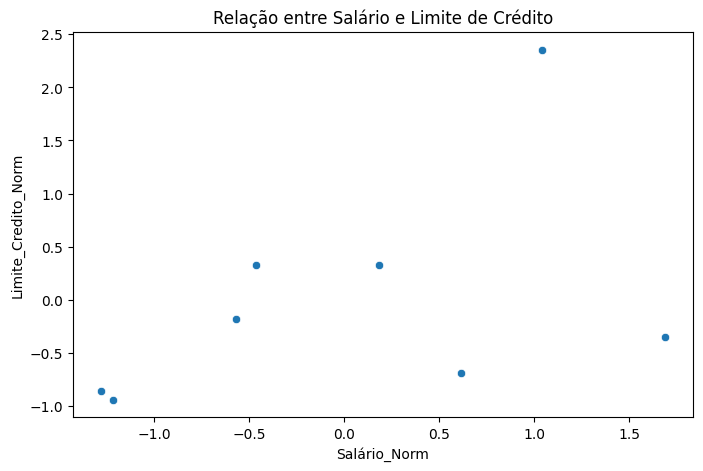

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Salário_Norm', y='Limite_Credito_Norm')
plt.title('Relação entre Salário e Limite de Crédito')
plt.show()


O gráfico de dispersão foi criado para avaliar a relação entre salário e limite de crédito duas variáveis numéricas e mostra uma tendência positiva, indicando que indivíduos com maior salário tendem a apresentar também maiores limites de crédito.


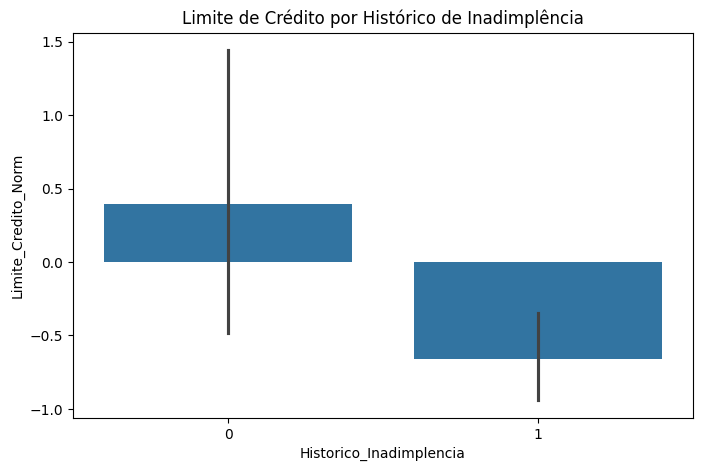

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Historico_Inadimplencia', y='Limite_Credito_Norm')
plt.title('Limite de Crédito por Histórico de Inadimplência')
plt.show()


O gráfico foi escolhido em função das caracteristicas da variável sendo o histórico de inadimplencia(possuir imóvel próprio) categorica binária é possível observar a divisão visual dos dados em dois grupos e o limite de crédito normalizado para evitar distorções que é uma variável numerica e contínua no eixo y para mostrar a distribuição dos valores de limite de credito nos 2 grupos. Os indivíduos com histórico de inadimplência apresentam, em média, menores limites de crédito, além de maior dispersão entre os valores concedidos. Isso indica que, além de receberem limites mais baixos, há maior variação na política de concessão dentro desse grupo.

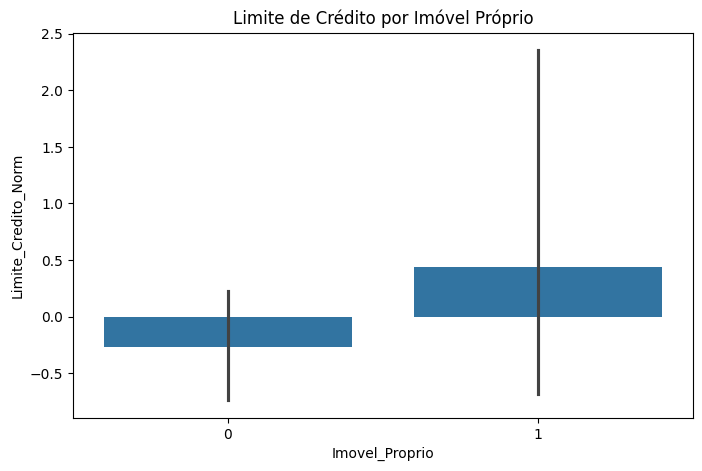

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Imovel_Proprio', y='Limite_Credito_Norm')
plt.title('Limite de Crédito por Imóvel Próprio')
plt.show()


O gráfico mostra que indivíduos sem imóvel concentram-se em valores menores de limite de crédito normalizado. Já aqueles que possuem imóvel apresentam, em média, limites de crédito mais elevados, com mediana superior em relação ao grupo que não possui imóvel. Tabém é possível observar uma maior variação dos valores de limite concedidos aos indivíduos que possuem crédito.